In [ ]:
#Inserting and Extracting Features relevant to each season

In [59]:
import os
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
import itertools







In [3]:
req_fields = ["Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", "HTHG", "HTAG", "HTR", "HS", 
              "AS", "HST", "AST", "HC", "AC"]

parser = lambda date: dt.strptime(date, '%d/%m/%y').date()
date_field = ["Date"]
season0001 = pd.read_csv("C:/Users/Jobin Binoy George/Downloads/Prem_Data/001.csv", usecols = req_fields, 
                         parse_dates = date_field, date_parser = parser)
season0102 = pd.read_csv("C:/Users/Jobin Binoy George/Downloads/Prem_Data/002.csv", usecols = req_fields, 
                         parse_dates = date_field, date_parser = parser)
season0203 = pd.read_csv("C:/Users/Jobin Binoy George/Downloads/Prem_Data/003.csv", usecols = req_fields, 
                         parse_dates = date_field, date_parser = lambda date: dt.strptime(date, '%d/%m/%Y').date())
season0304 = pd.read_csv("C:/Users/Jobin Binoy George/Downloads/Prem_Data/004.csv", usecols = req_fields, 
                         parse_dates = date_field, date_parser = parser)
season0405 = pd.read_csv("C:/Users/Jobin Binoy George/Downloads/Prem_Data/005.csv", usecols = req_fields, 
                         parse_dates = date_field, date_parser = parser)
season0506 = pd.read_csv("C:/Users/Jobin Binoy George/Downloads/Prem_Data/006.csv", usecols = req_fields, 
                         parse_dates = date_field, date_parser = parser)
season0607 = pd.read_csv("C:/Users/Jobin Binoy George/Downloads/Prem_Data/007.csv", usecols = req_fields, 
                         parse_dates = date_field, date_parser = parser)
season0708 = pd.read_csv("C:/Users/Jobin Binoy George/Downloads/Prem_Data/008.csv", usecols = req_fields, 
                         parse_dates = date_field, date_parser = parser)
season0809 = pd.read_csv("C:/Users/Jobin Binoy George/Downloads/Prem_Data/009.csv", usecols = req_fields, 
                         parse_dates = date_field, date_parser = parser)
season0910 = pd.read_csv("C:/Users/Jobin Binoy George/Downloads/Prem_Data/010.csv", usecols = req_fields, 
                         parse_dates = date_field, date_parser = parser)
season1011 = pd.read_csv("C:/Users/Jobin Binoy George/Downloads/Prem_Data/011.csv", usecols = req_fields, 
                         parse_dates = date_field, date_parser = parser)
season1112 = pd.read_csv("C:/Users/Jobin Binoy George/Downloads/Prem_Data/012.csv", usecols = req_fields, 
                         parse_dates = date_field, date_parser = parser)
season1213 = pd.read_csv("C:/Users/Jobin Binoy George/Downloads/Prem_Data/013.csv", usecols = req_fields, 
                         parse_dates = date_field, date_parser = parser)
season1314 = pd.read_csv("C:/Users/Jobin Binoy George/Downloads/Prem_Data/014.csv", usecols = req_fields, 
                         parse_dates = date_field, date_parser = parser)
season1415 = pd.read_csv("C:/Users/Jobin Binoy George/Downloads/Prem_Data/015.csv", usecols = req_fields, 
                         parse_dates = date_field, date_parser = parser)
season1516 = pd.read_csv("C:/Users/Jobin Binoy George/Downloads/Prem_Data/016.csv", usecols = req_fields, 
                         parse_dates = date_field, date_parser = parser)


In [50]:
def result(match):
    if match == 'W':
        return 3
    elif match == 'L' or match ==  'N':
        return 0
    else:
        return 1
def find_form_tpoints(string):
    Tpoints = 0
    for res in string:
        Tpoints+=result(res)
    return Tpoints
    
    
def add_stat_features(season):
    WeekNum = []
    scoreclubs = {}
    concedeclubs = {}
    statclubs = {}
    Tpoints = 0
    for match in season.groupby('HomeTeam').mean().T.columns:
        scoreclubs[match] = []
        concedeclubs[match] = []
        statclubs[match] = []
    
 
    for match in range(len(season)):
        HomeGsScor = season.iloc[match]['FTHG']
        AwayGsScor = season.iloc[match]['FTAG']
        AwayGsConc = HomeGsScor
        HomeGsConc = AwayGsScor
        scoreclubs[season.iloc[match].HomeTeam].append(HomeGsScor)
        scoreclubs[season.iloc[match].AwayTeam].append(AwayGsScor)
        concedeclubs[season.iloc[match].HomeTeam].append(HomeGsConc)
        concedeclubs[season.iloc[match].AwayTeam].append(AwayGsConc)
        if season.iloc[match].FTR == 'H':
            statclubs[season.iloc[match].HomeTeam].append('W')
            statclubs[season.iloc[match].AwayTeam].append('L')
        elif season.iloc[match].FTR == 'A':
            statclubs[season.iloc[match].AwayTeam].append('W')
            statclubs[season.iloc[match].HomeTeam].append('L')
        else:
            statclubs[season.iloc[match].AwayTeam].append('D')
            statclubs[season.iloc[match].HomeTeam].append('D')
  
    GS = pd.DataFrame(data=scoreclubs, index = [match for match in range(1,39)]).T
    GC = pd.DataFrame(data=concedeclubs, index = [match for match in range(1,39)]).T
    matchstats = pd.DataFrame(data=statclubs, index = [match for match in range(1,39)]).T
    points = matchstats.applymap(result)
    form = matchstats.copy()
    for match in range(1,6):
        pastgames = match
        for match in range(pastgames,39):
            form[match] = ''
            week = 0
            while week < pastgames:
                form[match] += matchstats[match-week]
                week += 1           
        matchnum = 10

        home_res = ['N' for match in range(pastgames * matchnum)]  
        away_res = ['N' for match in range(pastgames * matchnum)]

        week = pastgames
        
        for match in range((pastgames*matchnum),380):
            home = season.iloc[match].HomeTeam
            away = season.iloc[match].AwayTeam

            ptg = form.loc[home][week]           
            home_res.append(ptg[pastgames-1])                    

            ptg = form.loc[away][week]              
            away_res.append(ptg[pastgames-1]) 
            
            #Since games start from index 0 total matches played is match + 1
            totmatches = match+1

            if (totmatches % 10) == 0:
                week = week + 1

        season['HomeResult' + str(pastgames) + 'GamesAgo'] = home_res                 
        season['AwayResult' + str(pastgames)+ 'GamesAgo'] = away_res
    
    streak_names = ['HomeTeamFormLast5', 'AwayTeamFormLast5']
    streak_points = ['HomeTeamPointsLast5','AwayTeamPointsLast5']
    find_results = ['HomeResult', 'AwayResult']
     
    for streak_name, streak_point, thisres in zip(streak_names, streak_points, find_results):
        season[streak_name] = ''
        for z in range(1,6):
            season[streak_name] += season[f'{thisres}{z}GamesAgo']
        
        season[streak_point] = season[streak_name].apply(find_form_tpoints)
            
   
    
    
    GS[0] = 0
    GC[0] = 0
    points[0] = 0
    for match in range(2,39):
        GS[match] = GS[match] + GS[match-1]
        GC[match] = GC[match] + GC[match-1]
        points[match] = points[match] + points[match-1]

    week = 1
    HomeGsScor = []
    AwayGsScor = []
    HomeGsConc = []
    AwayGsConc = []
    HPoints = []
    APoints = []
    

    for match in range(380):
        home = season.iloc[match].HomeTeam
        away = season.iloc[match].AwayTeam
        HomeGsScor.append(GS.loc[home][week])
        AwayGsScor.append(GS.loc[away][week])
        HomeGsConc.append(GC.loc[home][week])
        AwayGsConc.append(GC.loc[away][week])
        HPoints.append(points.loc[home][week])
        APoints.append(points.loc[away][week])
        totmatches = match+1
        WeekNum.append(week)
        
        #20 teams in the league implying 10 head to head matches played per week
        if (totmatches% 10) == 0:
            week = week + 1
         
        
            
      
            
        
    season['HomeGS'] = HomeGsScor
    season['AwayGS'] = AwayGsScor
    season['HomeGC'] = HomeGsConc
    season['AwayGC'] = AwayGsConc
    season['HomePoints'] = HPoints
    season['AwayPoints'] = APoints
    season['WeekNum'] = WeekNum
    return season


season0001 = add_stat_features(season0001)
season0102 = add_stat_features(season0102)
season0203 = add_stat_features(season0203)
season0304 = add_stat_features(season0304)
season0405 = add_stat_features(season0405)
season0506 = add_stat_features(season0506)
season0607 = add_stat_features(season0607)
season0708 = add_stat_features(season0708)
season0809 = add_stat_features(season0809)
season0910 = add_stat_features(season0910)
season1011 = add_stat_features(season1011)
season1112 = add_stat_features(season1112)
season1213 = add_stat_features(season1213)
season1314 = add_stat_features(season1314)
season1415 = add_stat_features(season1415)
season1516 = add_stat_features(season1516)
    

<ipython-input-50-f5c5b87f82c5>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season['HomeResult' + str(pastgames) + 'GamesAgo'] = home_res
<ipython-input-50-f5c5b87f82c5>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season['AwayResult' + str(pastgames)+ 'GamesAgo'] = away_res


In [51]:
cols_needed = ["Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", "HS", 
              "AS", "HST", "AST", "HC", "AC", "HomeGS", "AwayGS", "HomeGC", "AwayGC", "HomePoints", "AwayPoints", 
               "HomeTeamFormLast5", "AwayTeamFormLast5", "HomeTeamPointsLast5", "AwayTeamPointsLast5","WeekNum"]

season0001 = season0001[cols_needed]
season0102 = season0102[cols_needed]
season0203 = season0203[cols_needed]
season0304 = season0304[cols_needed]
season0405 = season0405[cols_needed]
season0506 = season0506[cols_needed]
season0607 = season0607[cols_needed]
season0708 = season0708[cols_needed]
season0809 = season0809[cols_needed]
season0910 = season0910[cols_needed]
season1011 = season1011[cols_needed]
season1112 = season1112[cols_needed]
season1213 = season1213[cols_needed]
season1314 = season1314[cols_needed]
season1415 = season1415[cols_needed]
season1516 = season1516[cols_needed]

In [52]:
CL_Prem_pos = pd.read_csv("C:/Users/Jobin Binoy George/Downloads/Prem_Data/Prem_CL_prev_standings.csv")
CL_Prem_pos = CL_Prem_pos.fillna(20)
CL_Prem_pos.set_index(['Club'], inplace = True)

def add_prev_CL_Prem_pos(seasonset, posdata, season):
    HomePos =[] 
    AwayPos=[]
    HomeCLPos=[]
    AwayCLPos=[]
    for match in range(380):
        home = seasonset.iloc[match].HomeTeam
        away = seasonset.iloc[match].AwayTeam
        HomePos.append(posdata.loc[home][season])
        if(posdata.loc[home][season-1]=="GS"):
            HomeCLPos.append(20)
        elif (posdata.loc[home][season-1]=="R16"):
            HomeCLPos.append(16)
        elif (posdata.loc[home][season-1]=="QF"):
            HomeCLPos.append(8)
        elif (posdata.loc[home][season-1]=="SF"):
            HomeCLPos.append(4)
        elif (posdata.loc[home][season-1]=="F"):
            HomeCLPos.append(2)
        elif (posdata.loc[home][season-1]=="C"):
            HomeCLPos.append(1)
        else:
            HomeCLPos.append(posdata.loc[home][season-1])
            
            
        AwayPos.append(posdata.loc[away][season])
        if(posdata.loc[away][season-1]=="GS"):
            AwayCLPos.append(20)
        elif (posdata.loc[away][season-1]=="R16"):
            AwayCLPos.append(16)
        elif (posdata.loc[away][season-1]=="QF"):
            AwayCLPos.append(8)
        elif (posdata.loc[away][season-1]=="SF"):
            AwayCLPos.append(4)
        elif (posdata.loc[away][season-1]=="F"):
            AwayCLPos.append(2)
        elif (posdata.loc[away][season-1]=="C"):
            AwayCLPos.append(1)
        else:
            AwayCLPos.append(posdata.loc[away][season-1])
            
    seasonset['HomePremLastY'] = HomePos
    seasonset['AwayPremLastY'] = AwayPos
    seasonset['HomeCLLastY'] = HomeCLPos
    seasonset['AwayCLLastY'] = AwayCLPos
    return seasonset

season0001 = add_prev_CL_Prem_pos(season0001,CL_Prem_pos,1)
season0102 = add_prev_CL_Prem_pos(season0102,CL_Prem_pos,3)
season0203 = add_prev_CL_Prem_pos(season0203,CL_Prem_pos,5)
season0304 = add_prev_CL_Prem_pos(season0304,CL_Prem_pos,7)
season0405 = add_prev_CL_Prem_pos(season0405,CL_Prem_pos,9)
season0506 = add_prev_CL_Prem_pos(season0506,CL_Prem_pos,11)
season0607 = add_prev_CL_Prem_pos(season0607,CL_Prem_pos,13)
season0708 = add_prev_CL_Prem_pos(season0708,CL_Prem_pos,15)
season0809 = add_prev_CL_Prem_pos(season0809,CL_Prem_pos,17)
season0910 = add_prev_CL_Prem_pos(season0910,CL_Prem_pos,19)
season1011 = add_prev_CL_Prem_pos(season1011,CL_Prem_pos,21)
season1112 = add_prev_CL_Prem_pos(season1112,CL_Prem_pos,23)
season1213 = add_prev_CL_Prem_pos(season1213,CL_Prem_pos,25)
season1314 = add_prev_CL_Prem_pos(season1314,CL_Prem_pos,27)
season1415 = add_prev_CL_Prem_pos(season1415,CL_Prem_pos,29)
season1516 = add_prev_CL_Prem_pos(season1516,CL_Prem_pos,31)
    

    
    
    

<ipython-input-52-cbbdace2365f>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonset['HomePremLastY'] = HomePos
<ipython-input-52-cbbdace2365f>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonset['AwayPremLastY'] = AwayPos
<ipython-input-52-cbbdace2365f>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [56]:
allseasons = pd.concat([season0001, season0102, season0203, season0304, season0405, season0506, season0607, season0708, season0809, season0910, season1011, season1112, season1213, season1314, season1415, season1516])
allseasons.WeekNum = allseasons.WeekNum.astype(float)

allseasons['HomeGD'] = allseasons['HomeGS'] - allseasons['HomeGC']
allseasons['AwayGD'] = allseasons['AwayGS'] - allseasons['AwayGC']
allseasons['PosDif'] = allseasons['HomePremLastY'] - allseasons['AwayPremLastY']
allseasons['CLPosDif'] = allseasons['HomeCLLastY'] - allseasons['AwayCLLastY']
allseasons['FormDif'] = allseasons['HomeTeamPointsLast5'] - allseasons['AwayTeamPointsLast5']
allseasons['PointsDif'] = allseasons['HomePoints'] - allseasons['AwayPoints']

cols_to_normalize = ['HomeGD', 'AwayGD', 'PosDif','CLPosDif', 'FormDif', 'PointsDif']

for col in cols_to_normalize:
    allseasons[col] = allseasons[col]/allseasons.WeekNum


In [57]:
allseasons.to_csv("C:/Users/Jobin Binoy George/Downloads/Prem_Data/updateddata.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018EF3434FD0>,
      dtype=object)

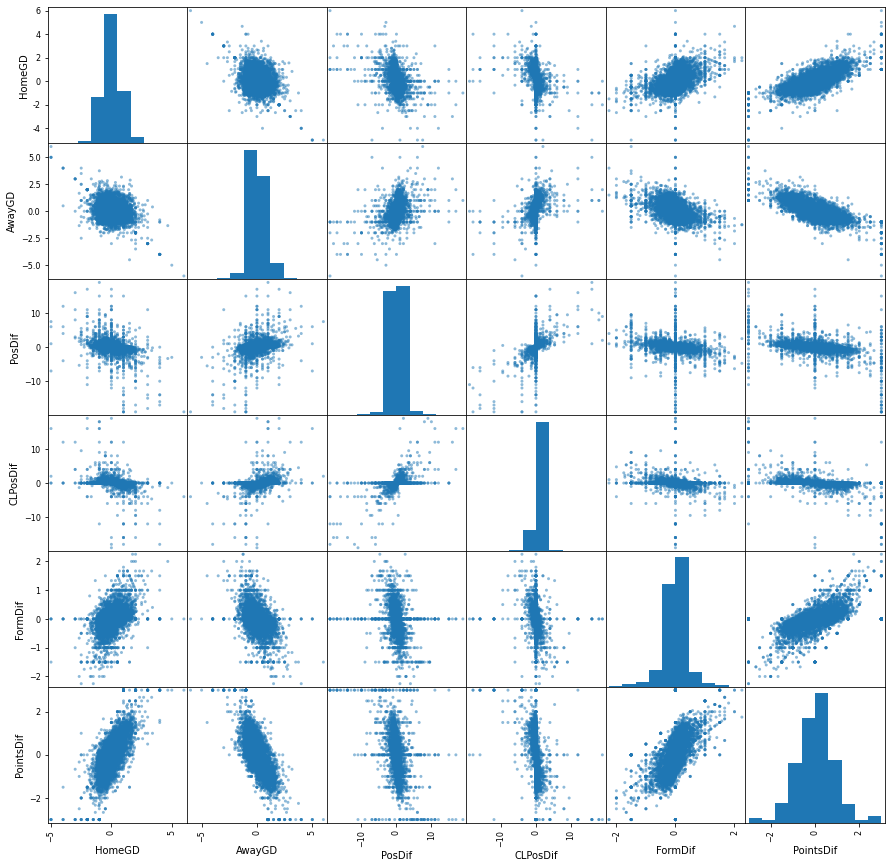

In [62]:
pd.plotting.scatter_matrix(allseasons[['HomeGD', 'AwayGD', 'PosDif','CLPosDif', 'FormDif', 'PointsDif']], figsize=(15,15))